In [1]:
print("Welcome to the Bi-Directional LSTM - Hello World !!! greeting from Ankit Kumar (Student at IITP)")

Welcome to the Bi-Directional LSTM - Hello World !!! greeting from Ankit Kumar (Student at IITP)


# Step0: defineProb_statement

**Objective**

To develop a machine learning model using a Single-layer perceptron (SLP or Uni-Variant) Bi-Directional LSTM to forecast the closing price of TCS stock for the next 5 days when dataset ended, also plot the trained of close over the whole data based on historical stock price data.








**Step-Taken**


write your intution in own word here ....

In [2]:
# Step 1: Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for plotting


from sklearn.preprocessing import MinMaxScaler   # for scalling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # for evaluation

from sklearn.model_selection import train_test_split  # while data point splitting

import plotly.graph_objects as go # for plotting of CandleStick view predicated close price

# using this we create mode (Simple RNN)
from tensorflow.keras.models import Sequential
# layer used is dense
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Step1: Load_Data

In [3]:
# Load the dataset

file_path = 'https://raw.githubusercontent.com/ankit485803/Research_Intern_IIIT_Guwahati/main/data/Finance_Eco/PrepStep_TCS_sep2002%20_NS_June2024.csv'


data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')


## s(i) EDA

EDA = Exploratory data analysis

In [4]:
# import ydata python library instead of pandas-profiling

# !pip install ydata-profiling

# from ydata_profiling import ProfileReport

# # create profile
# profile = ProfileReport(data)

# # save report
# profile.to_file(output_file='output_TCS.html')

## s(ii) Trail_01_deleteLast_5rows

In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/ankit485803/Research_Intern_IIIT_Guwahati/main/data/Finance_Eco/PrepStep_TCS_sep2002%20_NS_June2024.csv'

# Display the original dataset
print("Original dataset:")
print(data)

# Remove the last 5 rows
data = data[:-5]

# Display the updated dataset
print("\nUpdated dataset (last 5 rows removed):")
print(data)


Original dataset:
           Date         Open         High          Low        Close  \
0    2002-09-02    44.750000    45.974998    44.049999    44.500000   
1    2002-09-03    44.750000    44.937500    42.000000    42.412498   
2    2002-09-04    41.875000    43.750000    41.387501    43.337502   
3    2002-09-05    44.662498    44.862499    42.500000    43.075001   
4    2002-09-06    43.250000    43.250000    41.012501    41.474998   
...         ...          ...          ...          ...          ...   
5404 2024-06-12  3874.399902  3893.500000  3827.449951  3831.649902   
5405 2024-06-13  3856.800049  3890.000000  3852.000000  3878.149902   
5406 2024-06-14  3889.000000  3889.000000  3828.000000  3832.050049   
5407 2024-06-18  3826.050049  3842.000000  3795.050049  3815.100098   
5408 2024-06-19  3827.649902  3833.850098  3797.000000  3806.399902   

        Adj Close   Volume  
0       31.293869  2389568  
1       29.825882   986784  
2       30.476370  1449856  
3       30.29

# Step2: PreProcessing

## s(i) assign_Dep_Indep_Variable

In [6]:
# NOTE:
# this is just for your refence and more clearity



# X1_ref = scaled_data['Open', 'Low', 'High', 'Adj Close', 'Volume']
# Y1_ref = scaled_data['Close']


## this error comes
# IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

# Solution by Ankit: we have to be carefully while assign dependent + Independent variable i.e. USE INDEXING - METHOD

In [7]:
# Extract the last date in the dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])

# Generate the next 5 dates
next_5_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]


In [8]:
# Independent variables (X-axis): 'Open', 'Low', 'High', 'Adj Close', 'Volume'
# Dependent variable (Y-axis): 'Close'


X = data[['Close']].values # to make uni-variant, we have to delete rest column; and give close price and train our model , and ask to forcaste the next 5days

Y = data['Close'].values

## s(ii) Normalize_MinMax_Scale

In [9]:
# Scale the data

scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1))

Why 60?

Ans: In summary, look_back = 60 means you are using the previous 60 time steps of data to predict the next time step in your time series prediction task. Adjusting this parameter might affect how your model learns from historical data and predicts future values.



*   The choice of look_back = 60 in our example suggests that we are using 60 previous time steps (or data points) to predict the next data point in our time series.




## s(iii) split_TrainTest

In [10]:
# Split the data into training and test sets


train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing


X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [11]:
# Create sequences for Bi-directional LSTM


def create_sequences(X, Y, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        Ys.append(Y[i + time_steps])
    return np.array(Xs), np.array(Ys)


time_steps = 60  # Use the past 60 days to predict the next day

X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, time_steps)

# Step3: Build_Bi-Directional_LSTM_Model

In [12]:
# Define the Bi-Directional LSTM model

model = Sequential()

model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_seq.shape[1], X_seq.shape[2]))))

model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=50, return_sequences=False)))
model.add(Dropout(0.2))
model.add(Dense(units=1))


# compile
model.compile(optimizer='adam', loss='mean_squared_error')

In [13]:
 # Print the model summary

model.build(input_shape=(None, X_seq.shape[1], X_seq.shape[2]))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 60, 100)           20800     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 100)               60400     
 onal)                                                           
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 81301 (317.58 KB)
Trainable params: 81301 

## s(i) Model_Summary_Visualize

In [14]:
# import req library

!sudo apt-get install graphviz

!pip install pydot

from tensorflow.keras.utils import plot_model


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


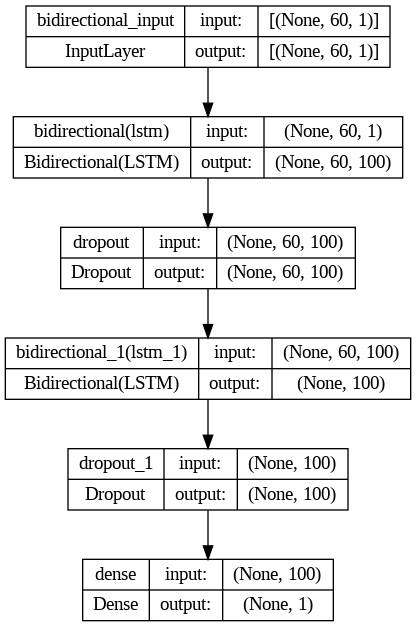

In [15]:
from tensorflow.keras.utils import plot_model

# Generate the plot and save it to a file
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot inline (if using a Jupyter notebook)
from IPython.display import Image
Image(filename='model_architecture.png')


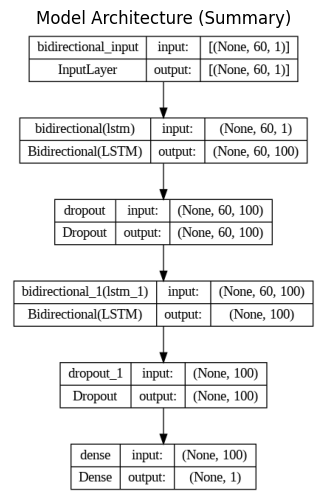

In [16]:
## If you are not using a Jupyter notebook, you can display the plot using matplotlib



img = plt.imread('model_architecture.png')
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis('off')
plt.title('Model Architecture (Summary)')
plt.show()

## s(ii) Compile_Train

In [17]:
# Train the model using the entire dataset with validation split

history = model.fit(X_seq, Y_seq, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
134/134 [==============================] - 57s 255ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 2/10
134/134 [==============================] - 21s 154ms/step - loss: 3.3289e-04 - val_loss: 0.0012
Epoch 3/10
134/134 [==============================] - 18s 136ms/step - loss: 3.1352e-04 - val_loss: 0.0022
Epoch 4/10
134/134 [==============================] - 18s 137ms/step - loss: 2.8671e-04 - val_loss: 9.4706e-04
Epoch 5/10
134/134 [==============================] - 20s 149ms/step - loss: 2.3528e-04 - val_loss: 0.0035
Epoch 6/10
134/134 [==============================] - 19s 140ms/step - loss: 2.6700e-04 - val_loss: 6.4694e-04
Epoch 7/10
134/134 [==============================] - 18s 134ms/step - loss: 2.7717e-04 - val_loss: 6.3251e-04
Epoch 8/10
134/134 [==============================] - 21s 157ms/step - loss: 2.5595e-04 - val_loss: 6.1245e-04
Epoch 9/10
134/134 [==============================] - 19s 140ms/step - loss: 2.0616e-04 - val_loss: 8.8652e-04
Epoch 10/10
134/134 [

# Step4: Predication

In [18]:
# Forecasting function

def forecast(model, X, n_steps):
    forecasted = []
    current_step = X[-1]

    for _ in range(n_steps):
        current_step = current_step.reshape(1, time_steps, X.shape[2])
        predicted = model.predict(current_step)
        forecasted.append(predicted[0, 0])
        current_step = np.roll(current_step, -1, axis=1)
        current_step[0, -1, 0] = predicted

    return scaler_Y.inverse_transform(np.array(forecasted).reshape(-1, 1))


In [19]:
# Forecast the next 5 days
forecasted_prices = forecast(model, X_seq, 5)

# Extract the last date in the dataset
last_date = pd.to_datetime(data['Date'].iloc[-1])


1/1 [==============================] - 0s 53ms/step


<ipython-input-18-f1b741060309>:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_step[0, -1, 0] = predicted


1/1 [==============================] - 0s 36ms/step


In [20]:
# Generate the next 5 dates
next_5_dates = [last_date + pd.Timedelta(days=i) for i in range(1, 6)]

# Create a DataFrame with the forecasted prices and dates
forecasted_df = pd.DataFrame({
    'Date': next_5_dates,
    'Forecasted_Close': forecasted_prices.flatten()
})

In [21]:
# Print the next 5 days' closing prices with dates

for date, price in zip(next_5_dates, forecasted_prices):
    print(f"Date: {date.strftime('%Y-%m-%d')}, Forecasted Close Price: {price[0]}")


Date: 2024-06-12, Forecasted Close Price: 3675.478515625
Date: 2024-06-13, Forecasted Close Price: 3661.18310546875
Date: 2024-06-14, Forecasted Close Price: 3641.614990234375
Date: 2024-06-15, Forecasted Close Price: 3620.05810546875
Date: 2024-06-16, Forecasted Close Price: 3595.03515625


## s(i) Next_5days


In [22]:
# only next 5days closing prices
print(forecasted_df)

        Date  Forecasted_Close
0 2024-06-12       3675.478516
1 2024-06-13       3661.183105
2 2024-06-14       3641.614990
3 2024-06-15       3620.058105
4 2024-06-16       3595.035156


## s(ii) plot_only5days

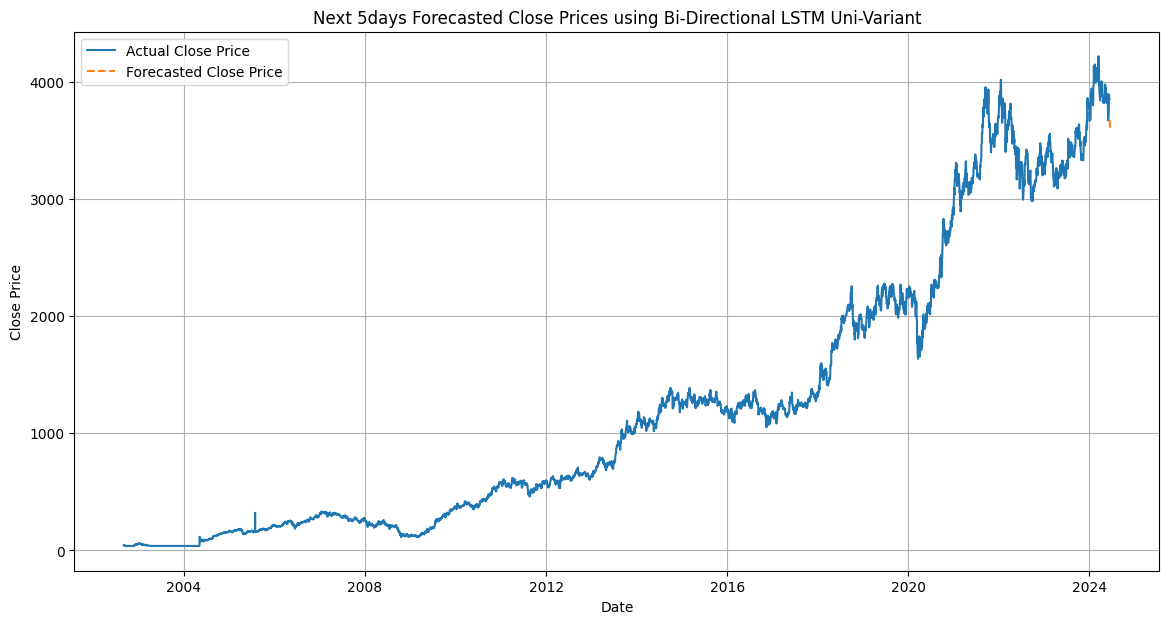

In [23]:
# Plot the actual and forecasted next 5days closing prices

plt.figure(figsize=(14, 7))

plt.plot(pd.to_datetime(data['Date']), data['Close'], label='Actual Close Price')
plt.plot(forecasted_df['Date'], forecasted_df['Forecasted_Close'], label='Forecasted Close Price', linestyle='--')


plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Next 5days Forecasted Close Prices using Bi-Directional LSTM Uni-Variant')
plt.legend()
plt.grid(True)
plt.show()

## s(iii) Generate_Predication_EntireData

this part is for entire dataset close price variance

In [24]:
# Predict closing prices for the entire dataset

predicted_prices_scaled = model.predict(X_seq)

predicted_prices = scaler_Y.inverse_transform(predicted_prices_scaled)

167/167 [==============================] - 14s 82ms/step


In [25]:
# Assuming 'data' contains the actual close prices and 'predicted_prices' are calculated


comparison_df = pd.DataFrame({
    'Date': data['Date'][:len(predicted_prices)],  # Match the length of 'Date' to predicted values
    'Actual_Close': data['Close'][:len(predicted_prices)],  # Match the length of 'Actual_Close' to predicted values
    'Predicted_Close': predicted_prices.flatten()  # Flatten if 'predicted_prices' is 2D
})


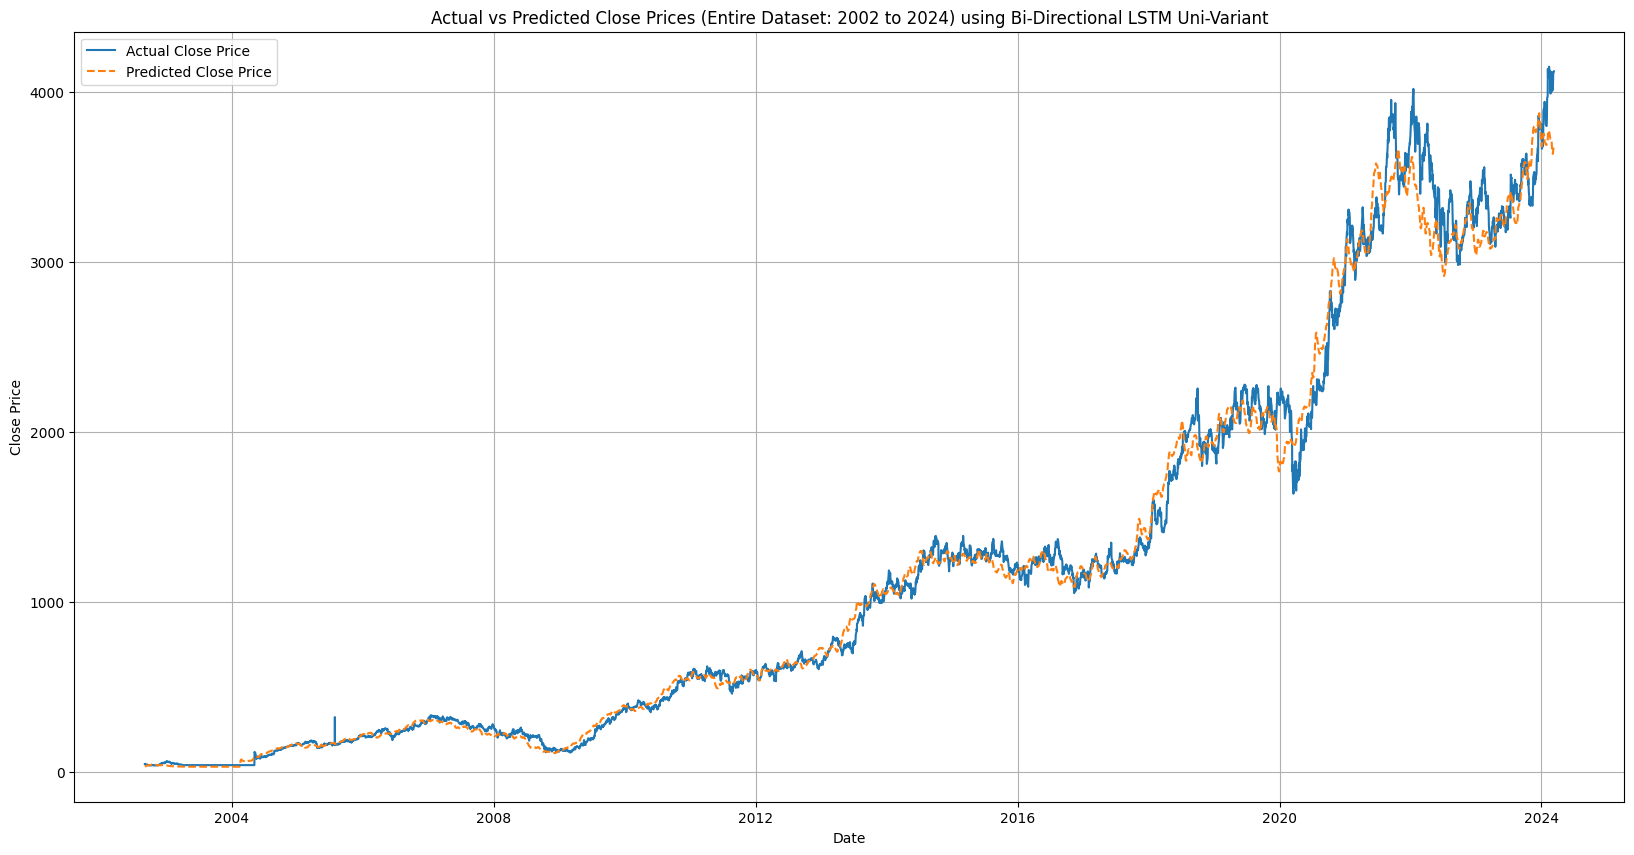

In [26]:
# Now proceed with your plotting code


plt.figure(figsize=(20, 10))

plt.plot(pd.to_datetime(comparison_df['Date']), comparison_df['Actual_Close'], label='Actual Close Price')
plt.plot(pd.to_datetime(comparison_df['Date']), comparison_df['Predicted_Close'], label='Predicted Close Price', linestyle='--')


plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Prices (Entire Dataset: 2002 to 2024) using Bi-Directional LSTM Uni-Variant')
plt.legend()
plt.grid(True)
plt.show()

## s(iv) see_accuracy_RMSE

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

# Extract actual prices from your 'data' DataFrame (adjust column name if needed)
actual_prices = data['Close'][:len(predicted_prices)]

# Now calculate the metrics
mse = mean_squared_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 12851.965899502859
R-squared: 0.9900144660074702


In [28]:
 # Import the necessary module for regression metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'actual_prices' and 'predicted_prices' from previous calculations are your true and predicted values
y_test = actual_prices
y_pred = predicted_prices

# Calculate appropriate metrics for regression problems
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the calculated metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 12851.965899502859
Root Mean Squared Error (RMSE): 113.36651136690614
Mean Absolute Error (MAE): 69.251453059262
R-squared (R2): 0.9900144660074702


## s(v) CandleStick_Predicated_ClosePrice

Can we plot the graph like the stock market candle; our intuition is that predicated close price (which is next 5days ) to see that exact value when I hove the mouse cursor on the graph

In [29]:
!pip install plotly

import plotly.graph_objects as go # Import the graph_objects module from plotly

In [30]:
# Plot the actual and forecasted closing prices like live stock market view

fig = go.Figure()

# Add candlestick chart for the actual data
fig.add_trace(go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'],
                name='Actual Close Price'))

In [31]:
# Add scatter plot for forecasted data


fig.add_trace(go.Scatter(x=forecasted_df['Date'], y=forecasted_df['Forecasted_Close'],
                         mode='lines+markers', name='Forecasted Close Price'))

fig.update_layout(
    title='Actual vs Forecasted Close Prices using Bi-Directional LSTM Uni-Variant ',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    hovermode='x unified'
)

fig.show()

In [32]:
# Plot the actual vs predicted closing prices (2002 to 2024) for the entire dataset
fig2 = go.Figure()

fig2.add_trace(go.Scatter(x=pd.to_datetime(comparison_df['Date']), y=comparison_df['Actual_Close'],
                          mode='lines', name='Actual Close Price'))
fig2.add_trace(go.Scatter(x=pd.to_datetime(comparison_df['Date']), y=comparison_df['Predicted_Close'],
                          mode='lines', name='Predicted Close Price'))

fig2.update_layout(
    title='Actual vs Predicted Close Prices (Entire Dataset: 2002 to 2024) using Bi-Directional LSTM Uni-Variant',
    xaxis_title='Date',
    yaxis_title='Close Price',
    legend_title='Legend',
    hovermode='x unified'
)

fig2.show()